In [ ]:
pip install easyocr

In [8]:
import cv2
import easyocr

# 이미지 불러오기
image = cv2.imread('/Users/leejaehot/leejaehot main/sejong/3-2/Pattern Recognition/패턴인식 텀프/car_video_gunja_snap_2/frame1680.jpg')

# 이미지 전처리
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
bilateral_filtered_image = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(bilateral_filtered_image, 30, 200)

# 번호판 영역 검출
contours, _ = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

for contour in contours:
    perimeter = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.018 * perimeter, True)

    if len(approx) == 4:  # 번호판은 주로 4개의 꼭짓점을 가짐
        plate_contour = approx
        x, y, w, h = cv2.boundingRect(contour)
        plate_image = image[y:y + h, x:x + w]
        break

# EasyOCR 초기화
reader = easyocr.Reader(['ko'])

# 번호판 이미지에서 텍스트 추출
result = reader.readtext(plate_image)

# 결과 출력
for detection in result:
    text = detection[1]
    print("인식된 번호판:", text)


인식된 번호판: 51조
인식된 번호판: 1633


[[[  14 1090]]

 [[  23 1170]]

 [[ 495 1237]]

 [[ 500 1158]]]
인식된 번호판: 51조
인식된 번호판: 1633


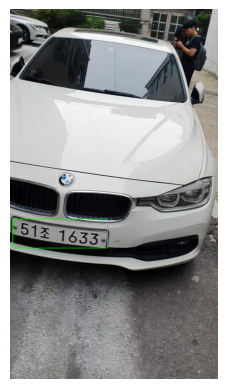

In [6]:
import cv2
from matplotlib import pyplot as plt
import easyocr

def ocr(img):
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    bilateral_filtered_image = cv2.bilateralFilter(gray, 11, 17, 17)
    edged = cv2.Canny(bilateral_filtered_image, 30, 200)

	# 번호판 영역 검출
    contours, _ = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
    for contour in contours:
        perimeter = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.018 * perimeter, True)
        if len(approx) == 4:  # 번호판은 주로 4개의 꼭짓점을 가짐
            x, y, w, h = cv2.boundingRect(contour)
            plate_image = image[y:y + h, x:x + w]

			# 번호판 부분에 bounding box 그리기
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            break
    print(approx)
    reader = easyocr.Reader(['ko'])
    result = reader.readtext(plate_image)
    for detection in result:
        text = detection[1]
        print("인식된 번호판:", text)
    # 결과 이미지 보여주기
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # 축 숨기기
    plt.show()
    
	
	
	
# 이미지 불러오기
image = cv2.imread('/Users/leejaehot/leejaehot main/sejong/3-2/Pattern Recognition/패턴인식 텀프/car_video_gunja_snap_2/frame1740.jpg')

# 이미지 전처리
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
bilateral_filtered_image = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(bilateral_filtered_image, 30, 200)

# 번호판 영역 검출
contours, _ = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

for contour in contours:
    perimeter = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.018 * perimeter, True)

    if len(approx) == 4:  # 번호판은 주로 4개의 꼭짓점을 가짐
        x, y, w, h = cv2.boundingRect(contour)
        plate_image = image[y:y + h, x:x + w]

        # 번호판 부분에 bounding box 그리기
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        break
print(approx)
# EasyOCR 초기화
reader = easyocr.Reader(['ko'])

# 번호판 이미지에서 텍스트 추출
result = reader.readtext(plate_image)

# 결과 출력
for detection in result:
    text = detection[1]
    print("인식된 번호판:", text)

# 결과 이미지 보여주기
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # 축 숨기기
plt.show()


In [ ]:
def imzoom(image, x, y, w, h):
  cropped = image[y:y+h, x:x+w]
  resized = cv2.resize(plate_image, (w*2, h*2))

  plt.imshow(resized)
  plt.axis('off')
  plt.show()

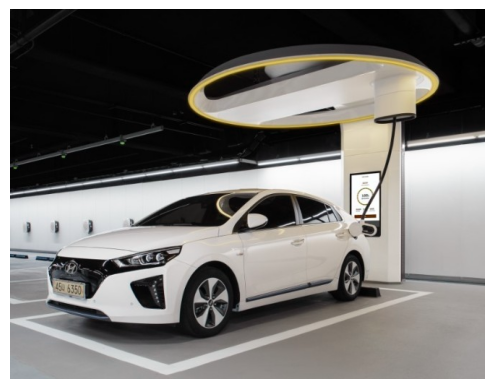

In [ ]:
img = cv2.imread("/content/다운로드.jpeg")
plt.imshow(img)
plt.axis('off')
plt.show()

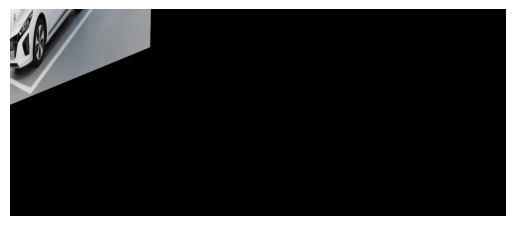

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread("/content/다운로드.jpeg", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

y_pos = 500
x_pos = 1200

original_coord = np.float32([[75, 270], [970, 570], [40, 820], [980, 685]])
warped_coord = np.float32([[0, 0], [x_pos, 0], [0, y_pos], [x_pos, y_pos]])

mat = cv2.getPerspectiveTransform(original_coord, warped_coord)

warped_img = cv2.warpPerspective(img, mat, (x_pos, y_pos))

plt.imshow(warped_img)
plt.axis('off')
plt.show()

In [ ]:
# 영상 불러오기
src1 = cv2.imread('box.png', cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread('box_in_scene.png', cv2.IMREAD_GRAYSCALE)

if src1 is None or src2 is None:
    print('Image load failed!')
    sys.exit()

# 특징점 알고리즘 객체 생성 (KAZE, AKAZE, ORB 등)
feature = cv2.KAZE_create() # 기본값인 L2놈 이용
#feature = cv2.AKAZE_create()
#feature = cv2.ORB_create()

# 특징점 검출 및 기술자 계산
kp1, desc1 = feature.detectAndCompute(src1, None)
kp2, desc2 = feature.detectAndCompute(src2, None)

# 특징점 매칭
matcher = cv2.BFMatcher_create()
matches = matcher.match(desc1, desc2_

# 좋은 매칭 결과 선별
matches = sorted(matches, key=lambda x: x.distance)
good_matches = matches[:80]

print('# of kp1:', len(kp1))
print('# of kp2:', len(kp2))
print('# of matches:', len(matches))
print('# of good_matches:', len(good_matches))

# 호모그래피 계산
# DMatch 객체에서 queryIdx와 trainIdx를 받아와서 크기와 타입 변환하기
pts1 = np.array([kp1[m.queryIdx].pt for m in good_matches]
				).reshape(-1, 1, 2).astype(np.float32)
pts2 = np.array([kp1[m.trainIdx].pt for m in good_matches]
				).reshape(-1, 1, 2).astype(np.float32)

H, _ = cv2.findHomography(pts1, pts2, cv2.RANSAC) # pts1과 pts2의 행렬 주의 (N,1,2)

# 호모그래피를 이용하여 기준 영상 영역 표시
dst = cv2.drawMatches(src1, kp1, src2, kp2, good_matches, None,
                      flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

(h, w) = src1.shape[:2]

# 입력 영상의 모서리 4점 좌표
corners1 = np.array([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]
                    ).reshape(-1, 1, 2).astype(np.float32)

# 입력 영상에 호모그래피 H 행렬로 투시 변환
corners2 = cv2.perspectiveTransform(corners1, H)

# corners2는 입력 영상에 좌표가 표현되있으므로 입력영상의 넓이 만큼 쉬프트
corners2 = corners2 + np.float32([w, 0])

# 다각형 그리기
cv2.polylines(dst, [np.int32(corners2)], True, (0, 255, 0), 2, cv2.LINE_AA)

cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()